# MNIST Single Digit Classification using neural network.

In this python notebook, we are going to build a model to classify handwritten digits.

For this purpose, we are going to use MNIST dataset that is available in keras.

Special thing about this dataset is it is already processed that means:


*   Images are converted into numpy array.
*   Images have been grayscaled for better performance of the model.
*   All the images have same dimension (28 x 28).

If you don't know how to do above 3 steps, I have written the code for each point below:



### 1.   Converting image to numpy array
To read an image as numpy array, we are going to use openCV library ```.imread()``` function


```
image_as_numpy_array = cv2.imread(<image file path>)
```


### 2.   Grayscaling the image
openCV provides ```.cvtColor()``` function to do so.
```
grayscale = cv2.cvtColor(image_as_numpy_array, cv2.COLOR_RGB2GRAY)
```

### 3. Resizing the image
We will use ```cv2.resize()``` method to do so.
```
image_resized = cv2.resize(grayscale, (28, 28))
```


All the above functions have already been performed in MNIST dataset. So when we load the dataset, we will get the data as numpy array.

Also, dataset is already splitted into training and test data.
- training - 60,000 images
- test - 10,000 images

For more reference, you can visit to the following link:
https://keras.io/api/datasets/mnist/

# Let's start with importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading the data
MNIST dataset returns Tuple of numpy arrays

(x_train, y_train), (x_test, y_test)

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Type of the data
If you check the type of the data, it is numpy array.

In [3]:
type(X_train)

numpy.ndarray

# Shape of each Image
All of the images have same dimension of 28 x 28

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Displaying an Image
Let's see one of the images from the dataset.

We will use imshow() function from cv2.

In [6]:
cv2_imshow(X_train[0])

The image is small because of its dimension.

You can use matplotlib.pyplot.imshow() method that displays the image as large.

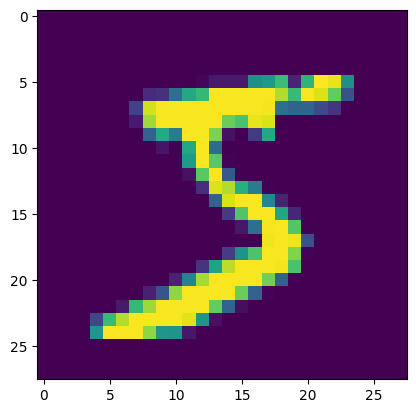

In [7]:
plt.imshow(X_train[0])

Don't be amazed by looking at colored image displayed by matplotlib.

It is just its way of displaying the image. The image is actually grayscaled.

# Label of each image

Let's check whether each image has label ranging from 0-9.

In [8]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# Normalising the input

All the image have pixel value ranging from 0-255.

The range is large that makes the models not to train well.

So, we will normalize the input in the range of 0-1 and this small range will help the model train well.

In [9]:
X_train = X_train/255
X_test = X_test/255

# Building neural network

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compiling

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

You need to choose optimal epoch number so that the model does not undergo overfitting.

In [12]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2724 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1250 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0666 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

The accuracy of our model is 99.37%.

# Evaluating the model

to get the accuracy on test data.

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9748
Loss: 0.08935713768005371
Accuracy: 0.9747999906539917


Accuracy on test data is 97.7%. It is pretty good.

# Prediction on X_test

In [14]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
Y_pred.shape

(10000, 10)

Each output is an array of size 10 that is probability of a digit to be 0,1,2,...or 9.

In [16]:
print(Y_pred[0])

[1.9059540e-05 1.5138832e-05 1.3587180e-02 9.0555650e-01 6.4682823e-08
 1.7882121e-04 8.1149823e-11 9.9996156e-01 9.8493779e-03 2.0039947e-01]


# Converting probability into label.

In [17]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# Confusion Matrix

Creating confusion matrix to get more inference.

In [18]:
conf_matrix = confusion_matrix(Y_test, Y_pred_label).numpy() # converting it into numpy array
type(conf_matrix)

numpy.ndarray

In [19]:
print(conf_matrix)

[[ 970    0    1    1    1    0    3    1    3    0]
 [   0 1121    4    0    0    1    3    1    5    0]
 [   3    0 1009    4    2    0    3    3    8    0]
 [   1    0    5  995    0    1    0    2    2    4]
 [   1    0    1    2  967    0    4    2    1    4]
 [   2    1    0   19    1  848   11    0    7    3]
 [   5    2    2    2    5    1  938    0    3    0]
 [   0    7   12    6    0    0    0  984    8   11]
 [   4    0    5    7    4    1    1    4  943    5]
 [   1    2    0    8   11    2    0    7    5  973]]


# Visualising the confusion matrix

Text(0.5, 25.722222222222214, 'Predicted')

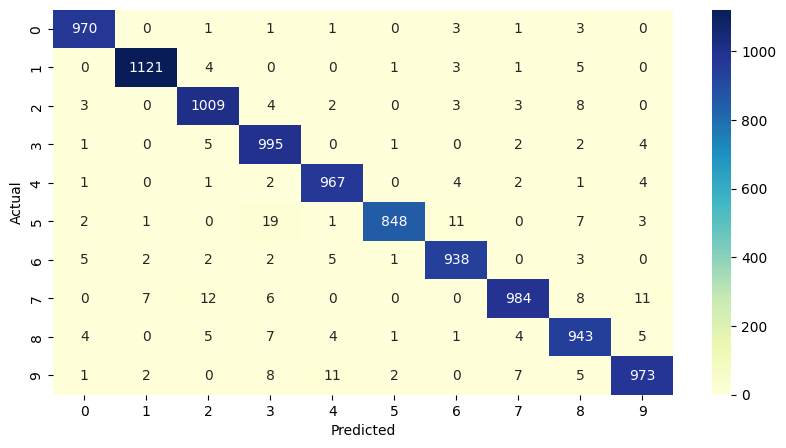

In [20]:
plt.figure(figsize = (10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# And that's it

## Now this model can be used to predict handwritten digits correctly.

In [21]:
# thank you